In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.0
pandas version :  2.2.2
seaborn version :  0.13.2


In [11]:
df = pd.read_csv('df_encoded.csv')

df.sample(10)


,Duration,Sales,Commision,Age,Claim,Type_Travel Agency,Distribution_Online,Agency_encoded,Product_encoded,Destination_encoded
122,13,63.7,15.93,53,0,0,1,0.059457,0.032520,0.059218
4755,6,22.0,7.70,70,0,0,1,0.004756,0.004319,0.006711
5262,15,22.5,5.63,29,0,0,1,0.059457,0.067015,0.059218
2451,7,13.5,3.38,36,0,0,1,0.059457,0.057260,0.059218
5616,35,38.0,14.44,48,0,1,1,0.030534,0.045455,0.011538
7479,19,0.0,16.09,29,0,0,1,0.059457,0.067015,0.059218
1600,32,18.0,6.30,72,0,0,1,0.004756,0.004319,0.011538
4027,10,25.0,16.25,44,0,1,1,0.036496,0.052632,0.011538
4387,4,22.0,7.70,29,0,0,1,0.004756,0.004319,0.034722
316,30,26.0,9.10,48,0,0,1,0.004756,0.004319,0.004773


# Kmeans Clustering

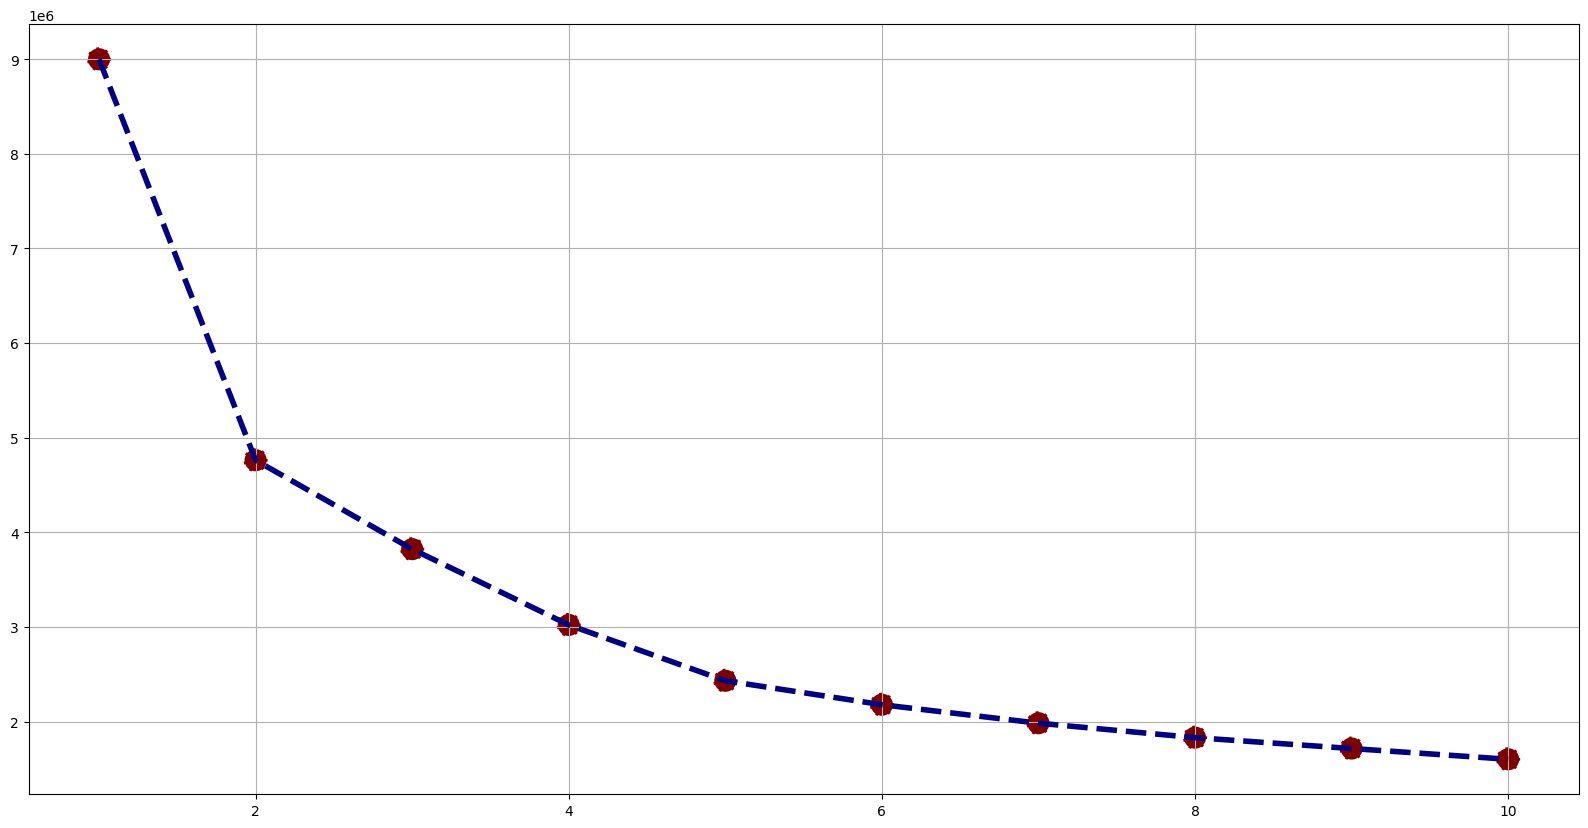

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4, linestyle='dashed')
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000', linestyle='dashed')
plt.grid(True)
plt.show()


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df.values)

KMeans(n_clusters=4, random_state=0)

In [14]:
df['cluster'] = kmeans.labels_
df.head()

,Duration,Sales,Commision,Age,Claim,Type_Travel Agency,Distribution_Online,Agency_encoded,Product_encoded,Destination_encoded,cluster
0,19,22.0,7.7,26,0,0,1,0.004756,0.004319,0.000000,1
1,8,16.0,4.0,28,0,0,1,0.059457,0.057260,0.059218,1
2,4,22.0,7.7,39,0,0,1,0.004756,0.004319,0.004296,1
3,103,26.0,9.1,48,0,0,1,0.004756,0.004319,0.034722,0
4,12,30.0,10.5,35,1,0,1,0.004756,0.004319,0.016043,1


In [18]:
df_raw=pd.read_csv('df_analysis.csv')

In [19]:
df_raw['cluster'] = kmeans.labels_

In [20]:
df_raw.sample(5)

,Agency,Type,Distribution,Product,Duration,Destination,Sales,Commision,Age,Claim,cluster
3252,JZI,Airlines,Online,Basic Plan,69,AUSTRALIA,26.00,9.10,27,No,0
6372,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.00,4.00,36,No,1
7978,JZI,Airlines,Online,Basic Plan,16,PHILIPPINES,18.00,6.30,46,No,2
7510,C2B,Airlines,Online,Bronze Plan,5,SINGAPORE,13.50,3.38,39,No,1
1828,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,30.55,7.64,34,No,1


In [31]:
df.groupby('cluster').agg(['mean', 'median'])

Duration             Sales         Commision               Age  \
              mean median       mean median       mean median       mean   
cluster                                                                    
0        81.189502   76.0  31.461975   30.0  10.608603  10.50  43.710854   
1        10.808736    9.0  22.381716   22.0   7.023635   6.30  32.174103   
2        14.003314   11.0  24.051201   22.0   8.081234   7.70  56.386495   
3        31.171697   32.0  41.486823   40.0  12.275116  12.25  37.187531   

                   Claim        Type_Travel Agency        Distribution_Online  \
        median      mean median               mean median                mean   
cluster                                                                         
0         42.0  0.019573    0.0           0.199288    0.0            0.828292   
1         32.0  0.034945    0.0           0.051794    0.0            0.973479   
2         55.0  0.016570    0.0           0.112262    0.0            0.929163   
3         36.0  0.039584    0.0           0.062840    0.0            0.964869   

               Agency_encoded           Product_encoded            \
        median           mean    median            mean    median   
cluster                                                             
0          1.0       0.018670  0.004756        0.018537  0.004319   
1          1.0       0.036535  0.059457        0.036575  0.057260   
2          1.0       0.020914  0.004756        0.020648  0.004319   
3          1.0       0.032377  0.030534        0.032706  0.032520   

        Destination_encoded            
                       mean    median  
cluster                                
0                  0.018815  0.006711  
1                  0.036140  0.059218  
2                  0.020862  0.006711  
3                  0.032984  0.034722

In [23]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df)
pcs = pca.transform(df)

In [24]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = df['cluster']
data_pca.sample(5)

,PC 1,PC 2,cluster
6378,37.271248,-23.678834,0
956,13.319308,-1.841944,3
5989,-9.239353,4.220202,2
4358,-13.430536,-6.328957,1
6281,-1.586630,15.273388,3


In [25]:
import matplotlib.pyplot as plt

def plot_clusters(data_pca):
    color_list = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

    plt.figure(figsize=(15, 10))
    for i, cluster in enumerate(data_pca['cluster'].unique()):
        df_cluster = data_pca[data_pca['cluster'] == cluster]
        plt.scatter(df_cluster['PC 1'], df_cluster['PC 2'], c=color_list[i], s=5, label=f'Cluster {cluster}')
        # Centroid positions
        plt.scatter(df_cluster['PC 1'].mean(), df_cluster['PC 2'].mean(), c=color_list[i], marker='X', edgecolor='k', s=250, zorder=10)

    plt.legend()
    plt.title('PCA Scatter Plot with Clusters')
    plt.xlabel('PC 1', fontsize=14)
    plt.ylabel('PC 2', fontsize=14)
    plt.show()



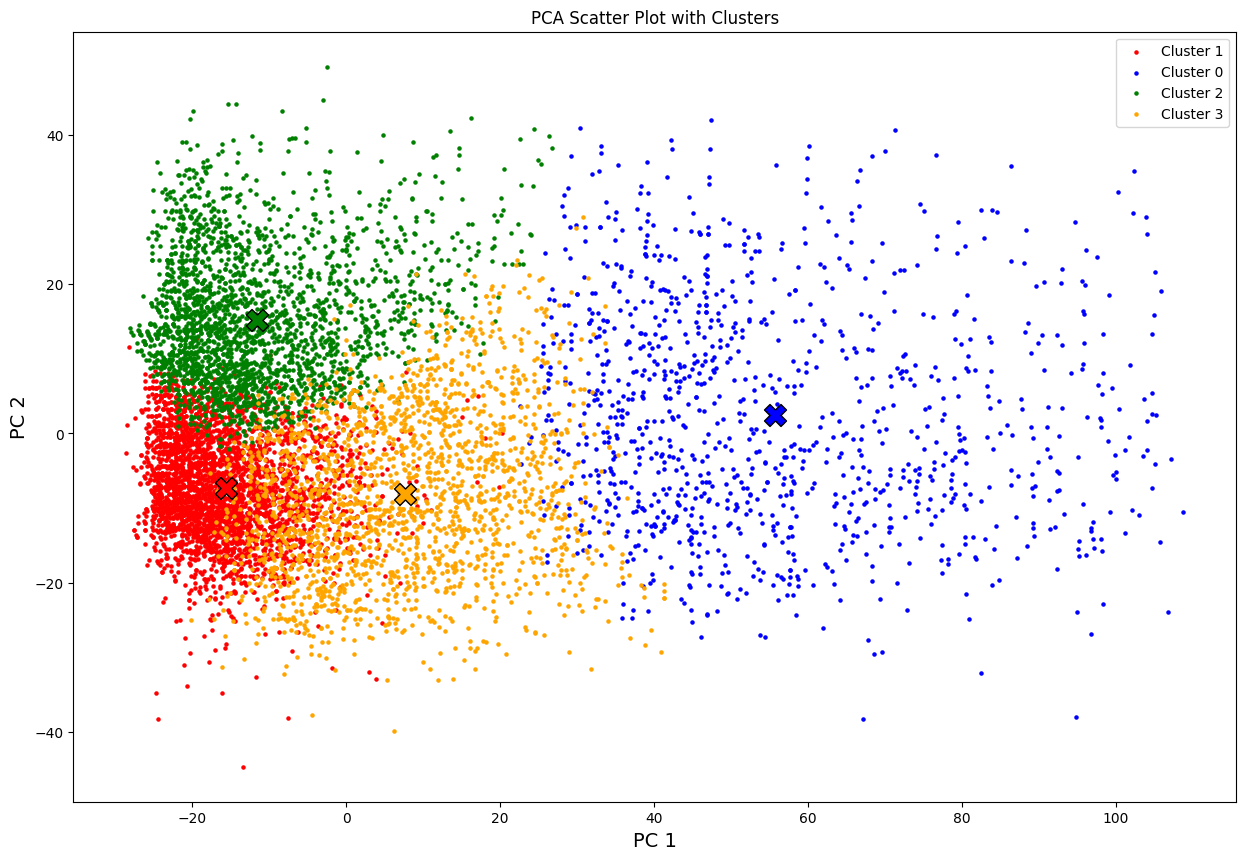

In [26]:
plot_clusters(data_pca)

In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        8764 non-null   object 
 1   Type          8764 non-null   object 
 2   Distribution  8764 non-null   object 
 3   Product       8764 non-null   object 
 4   Duration      8764 non-null   int64  
 5   Destination   8764 non-null   object 
 6   Sales         8764 non-null   float64
 7   Commision     8764 non-null   float64
 8   Age           8764 non-null   int64  
 9   Claim         8764 non-null   object 
 10  cluster       8764 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 719.1+ KB


In [39]:
claim_summary = df_raw.groupby('cluster')['Claim'].value_counts().unstack(fill_value=0)

summary = df_raw.groupby('cluster').agg({
    'Sales': 'sum',
    'Commision': 'sum',
    'Age': 'mean', 
    'Duration': 'mean',  
    'Product': 'first', 
    'Destination': 'first'  
}).reset_index()

summary = summary.join(claim_summary)

print(summary)


   cluster     Sales  Commision        Age   Duration             Product  \
0        0  35363.26   11924.07  43.710854  81.189502          Basic Plan   
1        1  71733.40   22510.75  32.174103  10.808736          Basic Plan   
2        2  58059.60   19508.10  56.386495  14.003314         Bronze Plan   
3        3  83844.87   24808.01  37.187531  31.171697  Comprehensive Plan   

          Destination    No  Yes  
0  KOREA, REPUBLIC OF  1102   22  
1               INDIA  3093  112  
2           SINGAPORE  2374   40  
3            MALAYSIA  1941   80  


In [ ]:
# Melihat distribusi produk
product_distribution = df_raw.groupby('cluster')['Product'].value_counts().unstack(fill_value=0)

# Melihat distribusi destinasi
destination_distribution = df_raw.groupby('cluster')['Destination'].value_counts().unstack(fill_value=0)

print(product_distribution)
print(destination_distribution)


Product  24 Protect  Basic Plan  Bronze Plan  Comprehensive Plan  Gold Plan  \
cluster                                                                       
0                14         567          175                  75          7   
1                 0        1064         1297                  24         40   
2               114        1154          423                  55         30   
3                15         688          550                  22         46   

Product  Premier Plan  Rental Vehicle Excess Insurance  Silver Plan  \
cluster                                                               
0                   8                                0           71   
1                   1                                0          475   
2                  17                                0          209   
3                  18                                1          394   

Product  Single Trip Travel Protect Gold  Single Trip Travel Protect Platinum  \
cluster          

In [41]:

summary.to_csv('summary.csv', index=False)

product_distribution.to_csv('product_distribution.csv', index=True)

destination_distribution.to_csv('destination_distribution.csv', index=True)
